### Testing HDF5 with MPI

In [1]:
import camber
import os
from IPython.utils import io
import numpy as np

In [2]:
os.system("git clone https://github.com/PrincetonUniversity/athena.git")
camber.compiler.run("cd athena && python configure.py -b --prob=orszag_tang -mpi -hdf5 --hdf5_path=${HDF5_PATH} && make clean && make all")

Output()

2023-06-24T18:30:17.803932+00:00 - Your Athena++ distribution has now been configured with the following options:
2023-06-24T18:30:17.803955+00:00 -   Problem generator:          orszag_tang
2023-06-24T18:30:17.803957+00:00 -   Coordinate system:          cartesian
2023-06-24T18:30:17.803959+00:00 -   Equation of state:          adiabatic
2023-06-24T18:30:17.803960+00:00 -   Riemann solver:             hlld
2023-06-24T18:30:17.803961+00:00 -   Magnetic fields:            ON
2023-06-24T18:30:17.803962+00:00 -   Number of scalars:          0
2023-06-24T18:30:17.803964+00:00 -   Special relativity:         OFF
2023-06-24T18:30:17.803965+00:00 -   General relativity:         OFF
2023-06-24T18:30:17.803967+00:00 -   Frame transformations:      OFF
2023-06-24T18:30:17.803968+00:00 -   Self-Gravity:               OFF
2023-06-24T18:30:17.803969+00:00 -   Super-Time-Stepping:        OFF
2023-06-24T18:30:17.803970+00:00 -   Debug flags:                OFF
2023-06-24T18:30:17.803971+00:00 -   Cod

In [3]:
# Run athena++ with hdf5 outputs. This should produce 11 outputs
worker_size = "LARGE"
worker = camber.mpi.run(
    command="mpirun -np 32 athena/bin/athena -i athinput.orszag-tang-hdf5",
    worker_size=worker_size
)

Output()

In [ ]:
worker.read_logs(tail_lines=10)

In [5]:
import athena_read
from plot_output_hdf5 import plot_output

In [6]:
# Read a few sample files.  athena_ready.athdf() has been edited to output the levels dataset, which should be all '0's
ath1 = athena_read.athdf("OrszagTang.out2.00000.athdf")
ath2 = athena_read.athdf("OrszagTang.out2.00001.athdf")
ath3 = athena_read.athdf("OrszagTang.out2.00002.athdf")

levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0]


/home/shane/personal/hdf_test/athena_read.py:793: RuntimeWarning: divide by zero encountered in long_scalars
  il_d = block_location[0] * block_size[0] // s if nx1 > 1 else 0
/home/shane/personal/hdf_test/athena_read.py:794: RuntimeWarning: divide by zero encountered in long_scalars
  jl_d = block_location[1] * block_size[1] // s if nx2 > 1 else 0
/home/shane/personal/hdf_test/athena_read.py:796: RuntimeWarning: divide by zero encountered in long_scalars
  iu_d = il_d + block_size[0] // s if nx1 > 1 else 1
/home/shane/personal/hdf_test/athena_read.py:797: RuntimeWarning: divide by zero encountered in long_scalars
  ju_d = jl_d + block_size[1] // s if nx2 > 1 else 1


levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0]
levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0]


plotting OrszagTang.out2.00000.athdf...
levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0]
plotting OrszagTang.out2.00001.athdf...
levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0        0        0        0]
plotting OrszagTang.out2.00002.athdf...
levels:  [       0        0        0        0        0        0        0        0
      256 16777216        0        0 67108864        0        0        0
        0        0        0        0        0        0        0        0
        0        0        0        0        0   

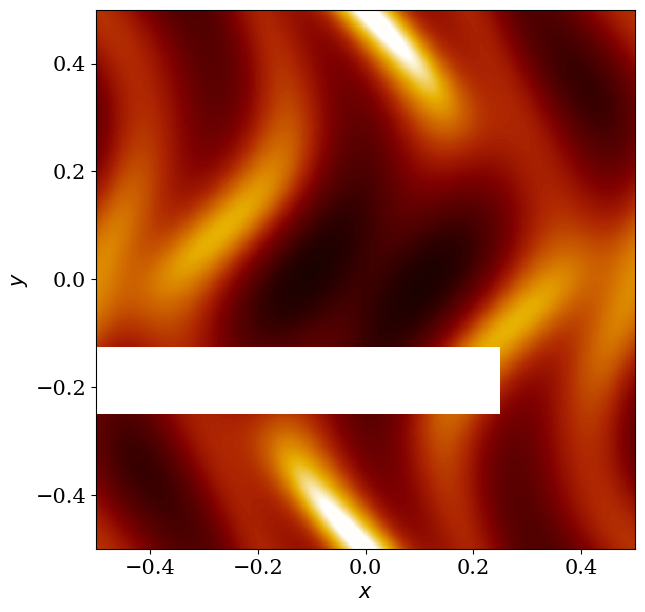

In [7]:
# Run plot_output to check first 11 outputs
plot_output()

In [9]:
# Attempt to run from a restart file to see if MPI i/) is working
worker_size = "LARGE"
worker = camber.mpi.run(
    command="mpirun -np 32 athena/bin/athena -r OrszagTang.00008.rst time/tlim=0.2",
    worker_size=worker_size
)

Output()

In [13]:
worker.read_logs(head_lines=10)

2023-06-24T18:48:07.734134+00:00 - 
2023-06-24T18:48:07.734168+00:00 - Setup complete, entering main loop...
2023-06-24T18:48:07.734173+00:00 - 
2023-06-24T18:48:07.734175+00:00 - cycle=240 time=8.0154790739601370e-02 dt=3.1633312447013453e-04
2023-06-24T18:48:07.744066+00:00 - cycle=241 time=8.0471123864071500e-02 dt=3.1625283305200557e-04
2023-06-24T18:48:07.753295+00:00 - cycle=242 time=8.0787376697123506e-02 dt=3.1617803592495260e-04
2023-06-24T18:48:07.763109+00:00 - cycle=243 time=8.1103554733048464e-02 dt=3.1610509570471012e-04
2023-06-24T18:48:07.772753+00:00 - cycle=244 time=8.1419659828753169e-02 dt=3.1603609802335680e-04
2023-06-24T18:48:07.782241+00:00 - cycle=245 time=8.1735695926776528e-02 dt=3.1596650657151677e-04
2023-06-24T18:48:07.792040+00:00 - cycle=246 time=8.2051662433348049e-02 dt=3.1588970655530360e-04
